<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/NewCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
tf.__version__

'2.2.0-rc2'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt




In [3]:
!git clone https://github.com/jenaroaaugusto/Dataset_musica_semvalidacao.git

Cloning into 'Dataset_musica_semvalidacao'...
remote: Enumerating objects: 4113, done.
remote: Counting objects: 100% (4113/4113), done.
remote: Compressing objects: 100% (2690/2690), done.
remote: Total 4113 (delta 1421), reused 4113 (delta 1421), pack-reused 0
Receiving objects: 100% (4113/4113), 1.44 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (1421/1421), done.


In [0]:
trainDir = os.path.join('/content/Dataset_musica_semvalidacao', 'Treinamento')
validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')


In [5]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.bmp')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

/content/Dataset_musica_semvalidacao/Treinamento
3393
['Bass' 'Trebble' 'Natural' 'DoubSharp' 'ACCIDENTAL_Flat' 'Alto' 'Sharp']


In [6]:
validation_dir = pathlib.Path(""+validationDir)
print(validation_dir)
total_val = len(list(validation_dir.glob('*/*.bmp')))
print(total_val)

/content/Dataset_musica_semvalidacao/Teste
700


In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 28
IMG_WIDTH = 28


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")


Found 3393 images belonging to 7 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=True,
                                                              color_mode="grayscale",
                                                              class_mode="categorical")


Found 700 images belonging to 7 classes.


In [11]:
train_data_gen.class_indices

{'ACCIDENTAL_Flat': 0,
 'Alto': 1,
 'Bass': 2,
 'DoubSharp': 3,
 'Natural': 4,
 'Sharp': 5,
 'Trebble': 6}

In [0]:
x,y=next(train_data_gen)


In [13]:
fy=np.argmax(y[1])
fy

2

In [0]:
ax=train_data_gen.class_indices

In [15]:
ax.keys()

dict_keys(['ACCIDENTAL_Flat', 'Alto', 'Bass', 'DoubSharp', 'Natural', 'Sharp', 'Trebble'])

In [16]:
train_data_gen.num_classes

7

In [17]:
val_data_gen.num_classes

7

# Rede Neural Convolucional - CNN  

In [0]:
from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense
# from keras import 

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),padding="same", activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
Total params: 92,512
Trainable params: 92,512
Non-trainable params: 0
____________________________________________________

In [20]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [0]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)


In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [24]:

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
106/106 [==============================] - 8s 75ms/step - loss: 0.6917 - tp: 2106.0000 - fp: 214.0000 - tn: 19952.0000 - fn: 1255.0000 - accuracy: 0.9376 - precision: 0.9078 - recall: 0.6266 - auc: 0.9605 - val_loss: 0.1946 - val_tp: 618.0000 - val_fp: 31.0000 - val_tn: 4001.0000 - val_fn: 54.0000 - val_accuracy: 0.9819 - val_precision: 0.9522 - val_recall: 0.9196 - val_auc: 0.9969
Epoch 2/15
106/106 [==============================] - 7s 68ms/step - loss: 0.1820 - tp: 3153.0000 - fp: 141.0000 - tn: 20211.0000 - fn: 239.0000 - accuracy: 0.9840 - precision: 0.9572 - recall: 0.9295 - auc: 0.9961 - val_loss: 0.0796 - val_tp: 655.0000 - val_fp: 13.0000 - val_tn: 4019.0000 - val_fn: 17.0000 - val_accuracy: 0.9936 - val_precision: 0.9805 - val_recall: 0.9747 - val_auc: 0.9987
Epoch 3/15
106/106 [==============================] - 7s 68ms/step - loss: 0.0534 - tp: 3298.0000 - fp: 49.0000 - tn: 20117.0000 - fn: 63.0000 - accuracy: 0.9952 - precision: 0.9854 - recall: 0.9813 - auc: 0.9

In [0]:
model.save_weights('Teste14.h5') 
model.save("modelo2.h5")

# Resultados visualizar 

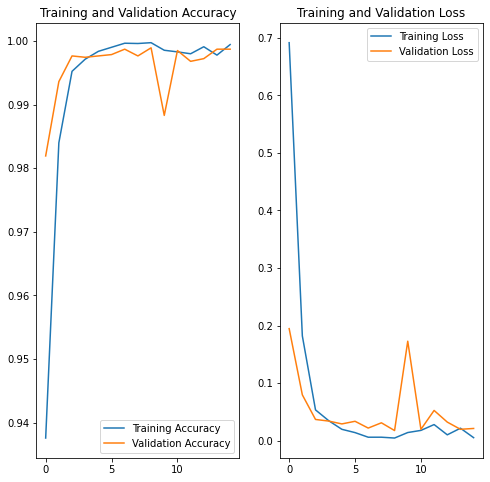

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# Aumento de exemplos e redução de Overfiting 

In [28]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 3393 images belonging to 7 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [32]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 3393 images belonging to 7 classes.


In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [34]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 3393 images belonging to 7 classes.


In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [36]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")

Found 3393 images belonging to 7 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [38]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                  directory=validation_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  shuffle=True,
                                                  color_mode="grayscale",
                                                  class_mode="categorical")

Found 700 images belonging to 7 classes.


#Nova CNN

In [39]:
model_new = models.Sequential()
model_new.add(layers.Conv2D(32, (2, 2),padding="same", activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Dropout(0.2))
model_new.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model_new.add(layers.MaxPooling2D(2,2))
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)        

In [40]:
model_new.add(layers.Flatten())
model_new.add(layers.Dropout(0.1))
model_new.add(layers.Dense(128, activation='relu'))
model_new.add(layers.Dense(64,activation='relu'))
model_new.add(layers.Dense(10, activation='relu'))
model_new.add(Dense(7))
model_new.add(Activation('softmax'))
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)        

In [41]:
model_new.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)        

In [42]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
106/106 [==============================] - 9s 86ms/step - loss: 1.8201 - tp: 734.0000 - fp: 32.0000 - tn: 24352.0000 - fn: 3330.0000 - accuracy: 0.8818 - precision: 0.9582 - recall: 0.1806 - auc: 0.7612 - val_loss: 1.5214 - val_tp: 107.0000 - val_fp: 19.0000 - val_tn: 4013.0000 - val_fn: 565.0000 - val_accuracy: 0.8759 - val_precision: 0.8492 - val_recall: 0.1592 - val_auc: 0.7798
Epoch 2/15
106/106 [==============================] - 8s 78ms/step - loss: 1.4844 - tp: 601.0000 - fp: 235.0000 - tn: 19931.0000 - fn: 2760.0000 - accuracy: 0.8727 - precision: 0.7189 - recall: 0.1788 - auc: 0.8002 - val_loss: 1.2850 - val_tp: 279.0000 - val_fp: 105.0000 - val_tn: 3927.0000 - val_fn: 393.0000 - val_accuracy: 0.8941 - val_precision: 0.7266 - val_recall: 0.4152 - val_auc: 0.8590
Epoch 3/15
106/106 [==============================] - 8s 77ms/step - loss: 1.2054 - tp: 1296.0000 - fp: 451.0000 - tn: 19715.0000 - 

In [0]:
model_new.save_weights('Teste15.h5') 
model_new.save("modelo3.h5")

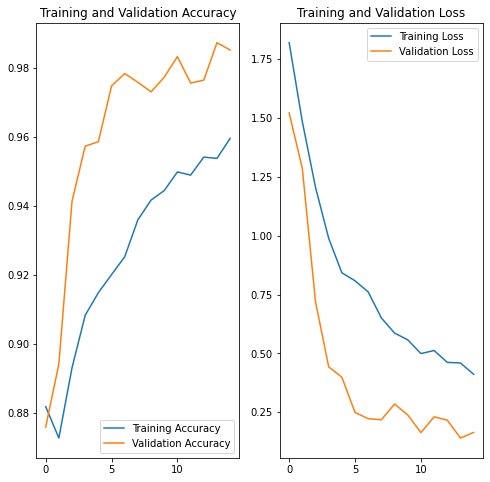

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()